# The Learning Problem

## Question 1: 
What types of Machine Learning, if any, best describe the following three scenarios:

<ol>
    <li>A coin classification system is created for a vending machine. The developers obtain exact coin specifications from the U.S. Mint and derive
a statistical model of the size, weight, and denomination, which the vending machine then uses to classify coins.</li>
    <li> Instead of calling the U.S. Mint to obtain coin information, an algorithm is
presented with a large set of labeled coins. The algorithm uses this data to
infer decision boundaries which the vending machine then uses to classify
its coins.
</li>
    <li>A computer develops a strategy for playing Tic-Tac-Toe by playing repeatedly and adjusting its strategy by penalizing moves that eventually lead
to losing.
</li>
</ol>

Correct Answer: **D**

1 = Not learning<br>
2 = Supervised learning<br>
3 = Reinforcement learning 

## Question 2:
Which of the following problems are best suited for Machine Learning?

<ol>
    <li>Classifying numbers into primes and non-primes.</li>
    <li>Detecting potential fraud in credit card charges.</li>
    <li>Determining the time it would take a falling object to hit the ground.</li>
    <li>Determining the optimal cycle for traffic lights in a busy intersection.</li>
</ol>

Correct Answer: **A**

# Bins and Marbles

## Question 3:
We have 2 opaque bags, each containing 2 balls. One bag has 2 black balls and
the other has a black ball and a white ball. You pick a bag at random and
then pick one of the balls in that bag at random. When you look at the ball,
it is black. You now pick the second ball from that same bag. What is the
probability that this ball is also black?

### Solution:

We need to calculate the following conditional probability:
<br>
<br>
$$ \mathbb{P}(\text{Second ball is black} \ | \ \text{First ball is black})$$

This can be calculated with:

$$ \mathbb{P}(\text{Second ball is black} \ | \ \text{First ball is black}) = \frac{\mathbb{P}(\text{Second ball is black} \ \cap \ \text{First ball is black})}{\mathbb{P}(\text{First ball is black})}$$

The numerator is easy to calculate. The bags are picked at random and we are certain to pick two black balls if the first bag is picked and certain NOT to pick two black balls if the second bag is picked. So: 

$$\mathbb{P}(\text{Second ball is black} \ \cap \ \text{First ball is black}) = \frac{1}{2}$$

The denominator is more complicated to calculate but we can use the total law of probability:

$$
\mathbb{P}(\text{First ball is black})= \mathbb{P}(\text{First ball is black}\ | \ \text{picked bag 1})\mathbb{P}(\text{picked bag 1}) + \mathbb{P}(\text{First ball is black}\ | \ \text{picked bag 2})\mathbb{P}(\text{picked bag 2})\\
= 1\cdot \frac{1}{2} + \frac{1}{2}\cdot \frac{1}{2}\\ 
= \frac{3}{4}
$$

Overall we have:

$$
\mathbb{P}(\text{Second ball is black} \ | \ \text{First ball is black}) = \frac{\frac{1}{2}}{\frac{3}{4}} = \frac{2}{3}
$$

Correct Answer: **D**

Consider a sample of 10 marbles drawn from a bin containing red and green marbles.
The probability that any marble we draw is red is µ = 0.55 (independently, with
replacement). We address the probability of getting no red marbles (ν = 0) in the
following cases:

## Question 4:
We draw only one such sample. Compute the probability that ν = 0

Since each "picking marbles out of the bin" event is independent this can be easily calculated as:

$$
\mathbb{P}(\text{picking 0 red marbles}) = \mathbb{P}(\text{picking 10 green marbles}) = (0.45)^{10} = 0.00034050628 = 3.405 \times 10^{-4}
$$

Correct Answer: **B**

## Question 5:
We draw 1,000 independent samples. Compute the probability that (at least)
one of the samples has ν = 0.

Easier to calculate the complement: 

$$
\mathbb{P}(\text{At least one sample with} \ \nu = 0) = 1 - \mathbb{P}(\text{No samples have} \ \nu = 0) = 1 - (1 - 3.405 \times 10^{-4})^{1000} = 0.28863119133 \approx 0.289
$$

Correct Answer: **C**

# Feasibility of Learning

## Question 6: 

8 possible target functions: $f_1, \cdots,f_8$

Option (a): g returns 1 for all 3 points

Score = (1)x3 + (3)x2 + (3)x1 + (1)x0 = **12**

Option (b): g returns 0 for all 3 points

Score = (1)x3 + (3)x2 + (3)x1 + (1)x0 = **12**

Option (c): g is the XOR function (returns 1 if the number of 1s is odd and 0 if the number of 1s is even)

Score = (1)x3 + (3)x2 + (3)x1 + (1)x0 = **12**

Option (d): g is opposite XOR

Score = (1)x3 + (3)x2 + (3)x1 + (1)x0 = **12**

Correct Answer: **E** (all equivalent)

# The Perceptron Learning Algorithm

Need to calculate two things: 1) number of iterations needed for convergence and 2) probability of misclassifying points

First we perform the algorithm for 1000 runs with $N=10$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# function that evaluates the correct labels for a point (a,b)
# output will be a +1 or -1 

def eval_f(a,b):
    num = slope*a + intercept 
    if (num<b):
        return mult 
    elif (num>b):
        return -1*mult
    else:
        print('EQUAL???')

## Basic structure of the algorithm:

In [3]:
# initialize a target function f

# generate two points
pts = []
for i in range(4):
    pts.append(random.uniform(-1,1))
    
# format = [x_1,y_1,x_2,y_2]

# calculate slope and intercept

slope = (pts[3]-pts[1])/(pts[2]-pts[0])
intercept = pts[1] - slope*pts[0]

mult = random.choice([-1,1])

print(slope,intercept,mult)

-0.3028428938434681 0.28232306379876443 1


In [4]:
#Generate 10 datapoints and use the function above to assign them labels.

train_set = []

x_s_pos = []
x_s_neg = []
y_s_pos = []
y_s_neg = []


for _ in range(10):
    x = random.uniform(-1,1)
    y = random.uniform(-1,1)
    label = eval_f(x,y)
    train_set.append((np.array([1.0,x,y]),label))
    if label>0:
        x_s_pos.append(x)
        y_s_pos.append(y)
    else:
        x_s_neg.append(x)
        y_s_neg.append(y)

print(train_set)


[(array([ 1.        , -0.71917748,  0.60458717]), 1), (array([ 1.        ,  0.2267957 , -0.75989838]), -1), (array([ 1.        ,  0.33753758, -0.97179439]), -1), (array([ 1.        , -0.57021739,  0.34253383]), -1), (array([1.       , 0.3318747, 0.5831938]), 1), (array([ 1.        , -0.31099435, -0.40476591]), -1), (array([ 1.        , -0.60120928, -0.14995681]), -1), (array([ 1.        ,  0.1109236 , -0.26060989]), -1), (array([ 1.        , -0.62944061,  0.17353714]), -1), (array([ 1.        , -0.86767746,  0.54985848]), 1)]


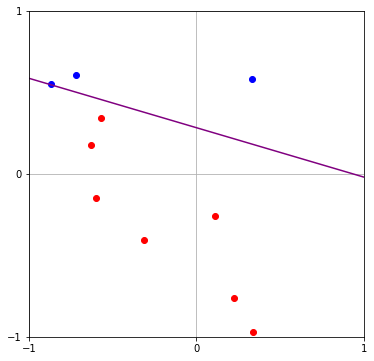

In [5]:
#draws line generated above

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

x = np.linspace(-1.0,1.0,10)
y = x*slope+intercept

plt.xticks([-1.0,0,1.0])
plt.yticks([-1.0,0,1.0])

ax.set(xlim = (-1,1), ylim=(-1,1))
ax.grid(True)

plt.plot(x_s_neg,y_s_neg,'o', color='red')
plt.plot(x_s_pos,y_s_pos,'o', color='blue')
plt.plot(x,y, color='purple')

plt.show()

In [6]:
# PLA 

#Initialize w with zeros

w = np.array([0,0,0])

#Iterate through training set to find mis-categorized point (where label doesnt match hypothesis)

finished = False #keeps track of when algorithm terminates
iterations = 0

while ((finished == False) and iterations<10000):

    for pt in train_set:
        if np.sign(np.dot(w,pt[0])) != pt[1]:
            #label is not correct
            #update w
            w = w + pt[1]*pt[0]
            print(f'new w = {w}')
            iterations += 1
            break
        else:
            continue
    else:
        #this triggers if alg terminates
        finished = True
        print('PLA converged')
        
print(f'num of iterations = {iterations}')

new w = [ 1.         -0.71917748  0.60458717]
new w = [ 0.         -0.94597318  1.36448555]
new w = [-1.         -0.37575579  1.02195172]
new w = [ 0.         -1.09493327  1.62653889]
new w = [-1.         -0.52471588  1.28400506]
new w = [ 0.         -0.19284117  1.86719885]
new w = [-1.          0.37737622  1.52466502]
new w = [ 0.         -0.34180126  2.12925219]
new w = [-1.          0.22841613  1.78671835]
new w = [ 0.         -0.49076135  2.39130552]
new w = [-1.          0.07945604  2.04877169]
PLA converged
num of iterations = 11


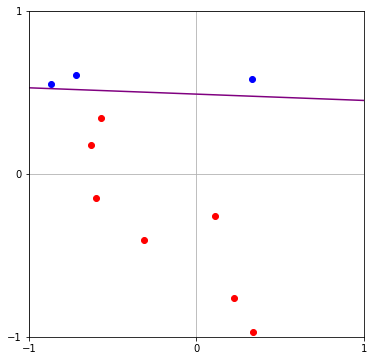

In [7]:
#draws line predicted by PLA

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

x = np.linspace(-1.0,1.0,10)
y = -(w[0] + x*w[1])/w[2] 

plt.xticks([-1.0,0,1.0])
plt.yticks([-1.0,0,1.0])

ax.set(xlim = (-1,1), ylim=(-1,1))
ax.grid(True)

plt.plot(x_s_neg,y_s_neg,'o', color='red')
plt.plot(x_s_pos,y_s_pos,'o', color='blue')
plt.plot(x,y, color='purple')

plt.show()

**BUG**

Forgot to implement x_0 = 1 and introduce an extra w_0 weight representing the threshold.

After fix algorithm worked as intended.

# PLA with N = 10

In [20]:
from statistics import mean

# Repeat PLA for 1000 runs. Keep track of iterations needed each run

iter_count = []
agree_probs = []

for _ in range(1000):

    # initialize a target function f
    pts = []
    for i in range(4):
        pts.append(random.uniform(-1,1))
    slope = (pts[3]-pts[1])/(pts[2]-pts[0])
    intercept = pts[1] - slope*pts[0]
    mult = random.choice([-1,1])
    
    # generate training set of size N = 10
    train_set = []
    for num in range(10):
        x = random.uniform(-1,1)
        y = random.uniform(-1,1)
        label = eval_f(x,y)
        train_set.append((np.array([1.0,x,y]),label))
        
    # run the PLA algorithm
    w = np.array([0,0,0])
    finished = False 
    iterations = 0
    while (finished != True):
        for pt in train_set:
            if np.sign(np.dot(w,pt[0])) != pt[1]:
                w = w + pt[1]*pt[0]
                iterations += 1
                break
            else:
                continue
        else:
            finished = True
    iter_count.append(iterations)
    
    #testing disagreement
    agree_count = 0
    for j in range(1000):
        test_x = random.uniform(-1,1)
        test_y = random.uniform(-1,1)
        test_pt = np.array([1,test_x,test_y])
        real_label = eval_f(test_x,test_y)
        predicted_label = np.sign(np.dot(w,test_pt))
        if real_label == predicted_label:
            agree_count += 1
        else:
            continue
    agree_prob = agree_count/1000
    agree_probs.append(agree_prob)
    
print(f'Average number of iterations = {mean(iter_count)}')
print(f'Average probability of disagreement = {1-mean(agree_probs)}')

Average number of iterations = 14.806
Average probability of disagreement = 0.10945300000000002


## Question 7:

Take N = 10. How many iterations does it take on average for the PLA to converge for N = 10 training points?

Correct Answer: **B** (closest to 15)

## Question 8:

Which of the following is closest to $\mathbb{P}(f(\mathbf{x}) \neq g(\mathbf{x}))$ for N = 10

Correct Answer: **C** (closest to 0.1)

# PLA with N = 100

In [22]:
# Repeat PLA for 1000 runs. Keep track of iterations needed each run

iter_count = []
agree_probs = []

for _ in range(1000):

    # initialize a target function f
    pts = []
    for i in range(4):
        pts.append(random.uniform(-1,1))
    slope = (pts[3]-pts[1])/(pts[2]-pts[0])
    intercept = pts[1] - slope*pts[0]
    mult = random.choice([-1,1])
    
    # generate training set of size N = 100
    train_set = []
    for num in range(100):
        x = random.uniform(-1,1)
        y = random.uniform(-1,1)
        label = eval_f(x,y)
        train_set.append((np.array([1.0,x,y]),label))
        
    # run the PLA algorithm
    w = np.array([0,0,0])
    finished = False 
    iterations = 0
    while (finished != True):
        for pt in train_set:
            if np.sign(np.dot(w,pt[0])) != pt[1]:
                w = w + pt[1]*pt[0]
                iterations += 1
                break
            else:
                continue
        else:
            finished = True
    iter_count.append(iterations)
    
    #testing disagreement
    agree_count = 0
    for j in range(1000):
        test_x = random.uniform(-1,1)
        test_y = random.uniform(-1,1)
        test_pt = np.array([1,test_x,test_y])
        real_label = eval_f(test_x,test_y)
        predicted_label = np.sign(np.dot(w,test_pt))
        if real_label == predicted_label:
            agree_count += 1
        else:
            continue
    agree_prob = agree_count/1000
    agree_probs.append(agree_prob)
    
print(f'Average number of iterations = {mean(iter_count)}')
print(f'Average probability of disagreement = {1-mean(agree_probs)}')

Average number of iterations = 217.189
Average probability of disagreement = 0.013353999999999977


## Question 9: 

Now, try N = 100. How many iterations does it take on average for the PLA to converge for N = 100 training points?

Correct Answer: **B** (closest to 100)

## Question 10:

Which of the following is closest to $\mathbb{P}(f(\mathbf{x}) \neq g(\mathbf{x}))$ for N = 100

Correct Answer: **B** (closest to 0.01)